#### @ Author 3x Group
XGBOOST

| Model Name | Accuaracy | Kappa Score | ROC AUC Curve value |
| ------------ | ---------------- | ---------------- | ---------------- | 
| XGBOOST with all the data |	88.04% | 0.40 | 0.66 |	
| XGBOOST with smote dataset 1 |	91.41% | 0.82 | 0.92 |
| XGBOOST with smote dataset 2 |	87.35% | 0.74 | 0.87 |

> XGBOOST made using the first smote data set is a clear winner from all sides

In [1]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
import numpy as np
import time
import sklearn
import xgboost as xgb
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import datasets
from sklearn.model_selection import cross_val_score
%matplotlib inline
r_state=52
import warnings
warnings.filterwarnings('ignore')
print("==================== Packages Loaded ======================")

==================== BLOCK 1 Started! ======================


C:\Users\moham\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


==================== Packages Loaded ======================


In [2]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('MainEncodedData.csv')
del df['Unnamed: 0']
df.info()
print("==================== Data Loaded In ======================")
print("==================== Data Shape "+str(df.shape)+" ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
BusinessTravel                       1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,...,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,...,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,...,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,...,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [4]:
train, test = sklearn.cross_validation.train_test_split(df, train_size = 0.75,random_state=r_state)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train['Attrition']
y_test=test['Attrition']

xgd_train=xgb.DMatrix(data=x_train,label=y_train)
xgd_test=xgb.DMatrix(data=x_test,label=y_test)

For Main Data Set : 1470
For Train Set : 1102
For Test Set : 368


In [67]:
params = {"objective":"binary:logistic", "max_depth":4,"nthread":5,"learning_rate":0.1,
         "subsample":0.2,"colsample_bytree":0.3,"n_estimators":20,"seed":52}

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(params=params)

In [68]:
# Fit the classifier to the training set
xg_cl.fit(x_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(x_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))



accuracy: 0.880435


True         0   1
Predicted         
0          305  37
1            7  19
             precision    recall  f1-score   support

          0       0.89      0.98      0.93       312
          1       0.73      0.34      0.46        56

avg / total       0.87      0.88      0.86       368

0.8804347826086957
Duration: --- 86.93891580502192 Minutes ---
ROC AUC: 0.66


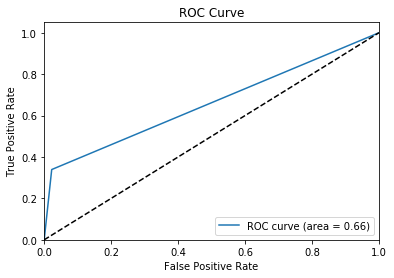

Kappa score is :0.4061032863849765


In [69]:
model=xg_cl
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))

#### Smote data set 1

==================== Data Loading ======================
==================== Data Loaded In ======================
Duration: --- 0.006064105033874512 Minutes ---
(2465, 51)
For Main Data Set : 2465
For Train Set : 1848
For Test Set : 617
accuracy: 0.914100
True         0    1
Predicted          
0          293   44
1            9  271
             precision    recall  f1-score   support

          0       0.87      0.97      0.92       302
          1       0.97      0.86      0.91       315

avg / total       0.92      0.91      0.91       617

0.9141004862236629
Duration: --- 0.01601221164067586 Minutes ---
ROC AUC: 0.92


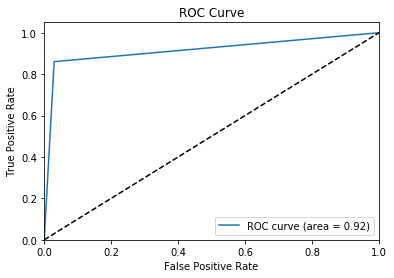

Kappa score is :0.8285347245890464


In [70]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('SmoteData_1.csv')
del df['Unnamed: 0']
print("==================== Data Loaded In ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))
print(df.shape)
# Break data into test and train

train, test = sklearn.cross_validation.train_test_split(df, train_size = 0.75,random_state=r_state)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[50], axis = 1)
x_test=test.drop(test.columns[50], axis = 1)
y_train=train['Attrition']
y_test=test['Attrition']

xgd_train=xgb.DMatrix(data=x_train,label=y_train)
xgd_test=xgb.DMatrix(data=x_test,label=y_test)

params = {"objective":"binary:logistic", "max_depth":4,"nthread":5,"learning_rate":0.1,
         "subsample":0.2,"colsample_bytree":0.3,"n_estimators":20,"seed":52}

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(params=params)

# Fit the classifier to the training set
xg_cl.fit(x_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(x_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

model=xg_cl
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))

#### Smote 2

==================== Data Loading ======================
==================== Data Loaded In ======================
Duration: --- 0.0017607649167378744 Minutes ---
(2466, 51)
For Main Data Set : 2466
For Train Set : 1849
For Test Set : 617
accuracy: 0.873582
True         0    1
Predicted          
0          257   40
1           38  282
             precision    recall  f1-score   support

          0       0.87      0.87      0.87       295
          1       0.88      0.88      0.88       322

avg / total       0.87      0.87      0.87       617

0.873581847649919
Duration: --- 0.011201536655426026 Minutes ---
ROC AUC: 0.87


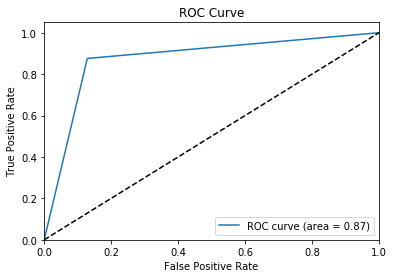

Kappa score is :0.746750581474894


In [71]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('SmoteData_2.csv')
del df['Unnamed: 0']
print("==================== Data Loaded In ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))
print(df.shape)
# Break data into test and train

train, test = sklearn.cross_validation.train_test_split(df, train_size = 0.75,random_state=r_state)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[50], axis = 1)
x_test=test.drop(test.columns[50], axis = 1)
y_train=train['Attrition']
y_test=test['Attrition']

xgd_train=xgb.DMatrix(data=x_train,label=y_train)
xgd_test=xgb.DMatrix(data=x_test,label=y_test)

params = {"objective":"binary:logistic", "max_depth":4,"nthread":5,"learning_rate":0.1,
         "subsample":0.2,"colsample_bytree":0.3,"n_estimators":20,"seed":52}

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(params=params)

# Fit the classifier to the training set
xg_cl.fit(x_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(x_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

model=xg_cl
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))